# **Problem Statement**
Consider the attached dataset about advertising and sales. The attributes denote the investments on advertising in TV, radio etc and the target variable is the total sales. The aim is to predict the sales from the investments on advertising.

1) Randomly divide the dataset into training (75%) and testing (25%) subsets [1 mark]

2) Using Linear Regression, fit a model to predict the sales from investments using your own formula. Compare the coefficients as found by the python library function [3 marks]

3) Compute the mean squared error on the testing set [1 marks]

4) Using ridge regression with different values of lambda (0.5, 1, 5, 10, 50, 100) plot the coefficients against each other, and also compare the test set mean squared errors. [3 marks]

5) Use the library function of "LASSO regression" to find out which of the 3 features is most important, i.e. whose coefficient is furthest from 0. [2 marks]

In [ ]:
# imported the data into code
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Assignment2/Advertising Dataset.csv')
data.describe()

,Serial Number,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# splitted the data into testing and training set [1]
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.25, random_state = 42, shuffle = True)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 114 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  150 non-null    int64  
 1   TV             150 non-null    float64
 2   Radio          150 non-null    float64
 3   Newspaper      150 non-null    float64
 4   Sales          150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 95 to 86
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  50 non-null     int64  
 1   TV             50 non-null     float64
 2   Radio          50 non-null     float64
 3   Newspaper      50 non-null     float64
 4   Sales          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


In [ ]:
# running linear regression without library support
import numpy as np

train_data = np.array(train[['Newspaper','TV','Radio']])
train_res = np.array(train.Sales)

test_data = np.array(test[['Newspaper','TV','Radio']])
test_res = np.array(test.Sales)

test_data.shape = (50,3)
test_res.shape = (50,1)

rows = len(train_data)
colm = len(train_data[0])
sumx = np.zeros(colm)
for i in range(rows):
    sumx = sumx + train_data[i]

x_mean = sumx/rows
y_mean = np.mean(train_res)

w1 = np.zeros((colm,colm))
w2 = np.zeros((colm,1))
for i in range(rows):
    x_tilda = np.array(train_data[i] - x_mean)
    y_tilda = np.array(train_res[i] - y_mean)
    x_tilda.shape = (3,1)
    y_tilda.shape = (1,1)
    
    w1 = w1 + x_tilda @ x_tilda.transpose()
    w2 = w2 + (x_tilda @ y_tilda)

# coefficients   
w = np.linalg.pinv(w1) @ w2 # pinv takes care of sigular matrix
# intercept
b = y_mean - w.transpose() @ x_mean

print('Coefficent of Linear Regression: \n',w)
print('Intercept of regression: ', b)


Coefficent of Linear Regression: 
 [[0.00256809]
 [0.04543356]
 [0.19145654]]
Intercept of regression:  [2.77830346]


In [ ]:
# verifying above results using sklearn library function for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

reg = linear_model.LinearRegression()
reg.fit(train[['Newspaper','TV','Radio']],train.Sales)
print('Coefficients of the regression: ', reg.coef_)
print('Intercept of the regression: ', reg.intercept_)

test_res = np.array(reg.predict(test[['Newspaper','TV','Radio']]))
test_data = np.array(test.Sales)


print('\nTest Data Values: ',test_data)
print('\nTest Results: ',test_res)
print('\nMean Square Error of Model: ', mean_squared_error(test_data,test_res))

Coefficients of the regression:  [0.00256809 0.04543356 0.19145654]
Intercept of the regression:  2.778303460245267

Test Data Values:  [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
 10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
 10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9 11.  12.8
 10.1  9.7 11.6  7.6 10.5 14.6 10.4 12. ]

Test Results:  [16.38348211 20.92434957 21.61495426 10.49069997 22.17690456 13.02668085
 21.10309295  7.31813008 13.56732111 15.12238649  8.92494113  6.49924401
 14.30119928  8.77233515  9.58665483 12.09485291  8.59621605 16.25337881
 10.16948105 18.85753401 19.5799036  13.15877029 12.25103735 21.35141984
  7.69607607  5.64686906 20.79780073 11.90951247  9.06581044  8.37295611
 12.40815899  9.89416076 21.42707658 12.14236853 18.28776857 20.18114718
 13.99303029 20.89987736 10.9313953   4.38721626  9.58213448 12.6170249
  9.93851933  8.06816257 13.45497849  5.25769423  9.15399537 14.09552838
  8.710298

# **Looking at the coefficients and intercept in both cases, it very evident that they are exactly same hence the my code for linear regression is correct.**

Coefficent of Linear Regression corresponding to alpha values: 
 [[0.002569   0.04543356 0.19145316]
 [0.0025699  0.04543356 0.19144979]
 [0.00257715 0.04543357 0.19142281]
 [0.00258621 0.04543358 0.19138909]
 [0.0026585  0.04543365 0.19111984]
 [0.00274841 0.04543374 0.19078442]]
Intercept of regressioncorresponding to alpha values:  [2.77835496 2.77840646 2.7788184  2.7793332  2.7834466  2.78857589]

 
Following are the plots depicting the coefficients against the lambda(alpha) value 
 



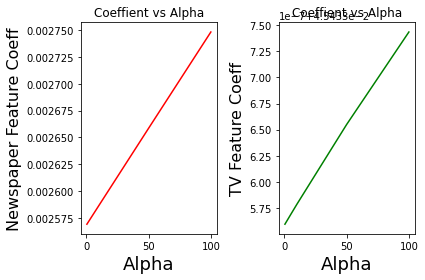

In [ ]:
# running ridge regression without library support
import numpy as np
from matplotlib import pyplot as plt

train_data = np.array(train[['Newspaper','TV','Radio']])
train_res = np.array(train.Sales)

test_data = np.array(test[['Newspaper','TV','Radio']])
test_res = np.array(test.Sales)

test_data.shape = (50,3)
test_res.shape = (50,1)

rows = len(train_data)
colm = len(train_data[0])
sumx = np.zeros(colm)
for i in range(rows):
    sumx = sumx + train_data[i]

x_mean = sumx/rows
y_mean = np.mean(train_res)

w1 = np.zeros((colm,colm))
w2 = np.zeros((colm,1))
for i in range(rows):
    x_tilda = np.array(train_data[i] - x_mean)
    y_tilda = np.array(train_res[i] - y_mean)
    x_tilda.shape = (3,1)
    y_tilda.shape = (1,1)
    
  #  print(x_tilda, y_tilda, x_tilda.transpose())
    w1 = w1 + x_tilda @ x_tilda.transpose()
    w2 = w2 + (x_tilda @ y_tilda)
    #print(x_tilda @ x_tilda.transpose(), w1.shape,'\n','\n',w2.shape,'\n')

alpha = np.array([0.5, 1, 5, 10, 50, 100])
b = np.array([])
w = np.array([[0,0,0]])
for i in range(len(alpha)):
    tmp = np.linalg.pinv(w1 + alpha[i] * np.identity(colm)) @ w2 # pinv takes care of sigular matrix
    b = np.append(b,y_mean - tmp.transpose() @ x_mean)
    tmp.shape = (1,3)
    w = np.append(w,tmp,axis = 0)

w = np.delete(w, (0), axis=0)

print('Coefficent of Linear Regression corresponding to alpha values: \n',w)
print('Intercept of regressioncorresponding to alpha values: ', b)

print('\n \nFollowing are the plots depicting the coefficients against the lambda(alpha) value \n \n')

plt.subplot(1, 2, 1)
plt.title("Coeffient vs Alpha")
plt.plot(alpha,w[:,0],'r')
plt.xlabel('Alpha', fontsize=18)
plt.ylabel('Newspaper Feature Coeff', fontsize=16)

plt.subplot(1, 2, 2)
plt.title("Coeffient vs Alpha")
plt.plot(alpha,w[:,1],'g')
plt.xlabel('Alpha', fontsize=18)
plt.ylabel('TV Feature Coeff', fontsize=16)
plt.tight_layout()



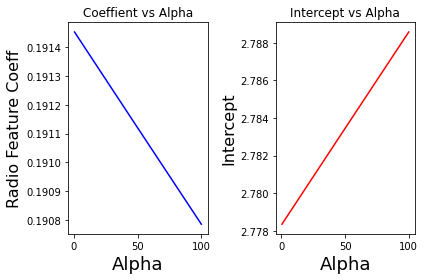

In [ ]:

plt.subplot(1, 2, 1)
plt.title("Coeffient vs Alpha")
plt.plot(alpha,w[:,2],'b')
plt.xlabel('Alpha', fontsize=18)
plt.ylabel('Radio Feature Coeff', fontsize=16)

plt.subplot(1, 2, 2)
plt.title("Intercept vs Alpha")
plt.plot(alpha,b,'r')
plt.xlabel('Alpha', fontsize=18)
plt.ylabel('Intercept', fontsize=16)

plt.tight_layout()

In [ ]:
# running ridge regression with library support for comparing
from sklearn import linear_model
import numpy as np

alpha = np.array([0.5, 1, 5, 10, 50, 100])
for i in range(len(alpha)):
    reg = linear_model.Ridge(alpha = alpha[i])
    reg.fit(train[['Newspaper','TV','Radio']],train.Sales)
    print('\nFor alpha = ',alpha[i])
    print('\nCoefficients of the regression: ', reg.coef_)
    print('Intercept of the regression: ', reg.intercept_)

    test_res = np.array(reg.predict(test[['Newspaper','TV','Radio']]))
    test_data = np.array(test.Sales)
    print('Mean Square Error of Model: ',mean_squared_error(test_data,test_res))



For alpha =  0.5

Coefficients of the regression:  [0.002569   0.04543356 0.19145316]
Intercept of the regression:  2.778354960413946
Mean Square Error of Model:  2.880010221482002

For alpha =  1.0

Coefficients of the regression:  [0.0025699  0.04543356 0.19144979]
Intercept of the regression:  2.7784064591905864
Mean Square Error of Model:  2.8799967177847297

For alpha =  5.0

Coefficients of the regression:  [0.00257715 0.04543357 0.19142281]
Intercept of the regression:  2.7788183992992312
Mean Square Error of Model:  2.879888865076685

For alpha =  10.0

Coefficients of the regression:  [0.00258621 0.04543358 0.19138909]
Intercept of the regression:  2.779333199214868
Mean Square Error of Model:  2.879754491049626

For alpha =  50.0

Coefficients of the regression:  [0.0026585  0.04543365 0.19111984]
Intercept of the regression:  2.7834465981709204
Mean Square Error of Model:  2.87869710786914

For alpha =  100.0

Coefficients of the regression:  [0.00274841 0.04543374 0.190784

# **Looking at the coefficients and intercept in both cases, it very evident that they are exactly same hence the my code for ridge regression is correct.**

In [ ]:
# to find out which of the 3 features is most important
from sklearn import linear_model
import numpy as np

# making an array of experimental values of alpha values
alpha = np.array([0.5, 1, 5, 10, 50, 100])
for i in range(len(alpha)):
    reg = linear_model.Lasso(alpha = alpha[i])
    reg.fit(train[['Newspaper','TV','Radio']],train.Sales)
    print('\nFor alpha = ',alpha[i])
    print('\nCoefficients of the regression: ', reg.coef_)
    print('Intercept of the regression: ', reg.intercept_)

    test_res = np.array(reg.predict(test[['Newspaper','TV','Radio']]))
    test_data = np.array(test.Sales)
    print('Mean Square Error of Model: ',mean_squared_error(test_data,test_res))



For alpha =  0.5

Coefficients of the regression:  [0.00192577 0.04538103 0.18954544]
Intercept of the regression:  2.850806969198791
Mean Square Error of Model:  2.855967571405766

For alpha =  1.0

Coefficients of the regression:  [0.0012829  0.0453285  0.18763464]
Intercept of the regression:  2.9233220561085798
Mean Square Error of Model:  2.83462694108926

For alpha =  5.0

Coefficients of the regression:  [0.         0.04490881 0.17029713]
Intercept of the regression:  3.4339758620085394
Mean Square Error of Model:  2.7879079178127433

For alpha =  10.0

Coefficients of the regression:  [0.         0.04438441 0.14777315]
Intercept of the regression:  4.043440636834832
Mean Square Error of Model:  2.950363670382994

For alpha =  50.0

Coefficients of the regression:  [0.         0.03994373 0.        ]
Intercept of the regression:  8.19495328956829
Mean Square Error of Model:  9.824229208347278

For alpha =  100.0

Coefficients of the regression:  [0.         0.03299301 0.        

# **As we see the first and last coeffients converge to zero as we increase alpha value for LASSO, we conclude that the middle coefficient which corresponds to *TV* feature is most important.**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


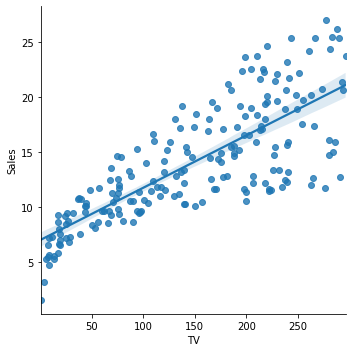

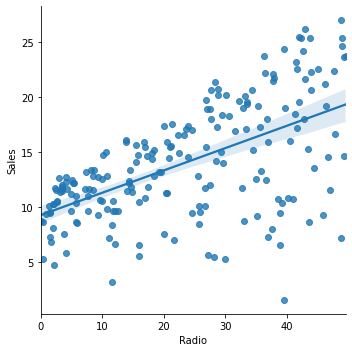

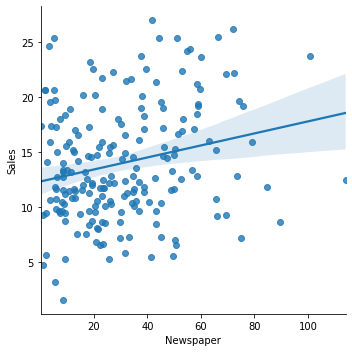

In [ ]:
# just exploring seaborn
# plotted the dependency of sales on each of 3 independent variables
import seaborn as sns
sns.lmplot("TV", "Sales", data = data)
sns.lmplot("Radio", "Sales", data = data)
sns.lmplot("Newspaper", "Sales", data = data)